In [1]:
import tellurium as te
from scipy.optimize import basinhopping,differential_evolution, minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = '''
    -> U ; Uptake
    U -> R ; unpacking_rate * U ;
      -> R ; replicating_rate * R * (kr/ (kr + R));
    R -> P ; translating_rate * R;
    P -> A ; packing_rate * P;
    A -> Secretion ; secretion_rate * A;

    Uptake = 0.0 ;
    unpacking_rate = 1.0 / 10.0 * 60.0;
    replicating_rate = 1.0 / 20.0 * 60.0;
    translating_rate = 1.0 / 30.0 * 60.0;
    packing_rate = 1.0 / 10.0 * 60.0;
    secretion_rate = 1.0 / 10.0 * 60.0;
    kr = 1000/(replicating_rate/translating_rate-1) ;
    U = 1.0 ;
    R = 0.0 ;
    A = 0.0;
'''

In [3]:
def cost_fun(p):
    diff = 0
    m = te.loada(model)
    [ru,r_max,rt,rp,rs,kr] = p
    
    m.unpacking_rate = ru
    m.replicating_rate=r_max
    m.translating_rate = rt
    m.packing_rate = rp
    m.secreting_rate = rs
    m.kr = kr
    s = m.simulate(t[0],t[-1],1000,['time','A'])
    
    for i in range(len(t)):
        S = s[:,1][min(range(len(s[:,0])), key = lambda j: abs(s[:,0][j]-t[i]))]
        diff += (V[i]-S)**2

    diff = np.sqrt(diff)/len(t) 
    return(diff)

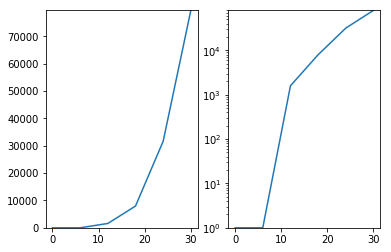

In [14]:
'https://wwwnc.cdc.gov/eid/article/26/6/20-0516-f4'
t = [0.0,6.0,12.0,18.0,24.0,30.0]
V = [1.0,1.0,10.0**(3.2),10**(3.9),10**(4.5),10**(4.9)]

plt.subplot(1, 2, 1)
plt.plot(t,V)
plt.ylim([V[0],V[-1]])

plt.subplot(1, 2, 2)
plt.plot(t,V)
plt.yscale('log')
plt.ylim([V[0],V[-1]])

plt.show()

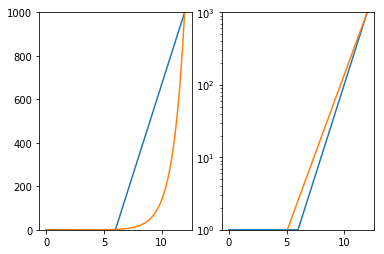

In [10]:
t = [0.0,6.0,12.0]
V = [1.0,1.0,10.0**3]

initial_guess = [1,1,1,1,1,10**7]
minimizer_kwargs = {"method": 'Nelder-Mead'}
#res3 = basinhopping(cost_fun,initial_guess,niter_success = 5)
res3 = minimize(cost_fun,initial_guess,method='Nelder-Mead')

[ru,r_max,rt,rp,rs,kr] = res3.x

m = te.loada(model)
m.unpacking_rate = ru
m.replicating_rate=r_max
m.translating_rate = rt
m.packing_rate = rp
m.secreting_rate = rs
m.kr = kr

s = m.simulate(t[0],t[-1],1000,['time','A'])

plt.subplot(1, 2, 1)
plt.plot(t,V)
plt.plot(s[:,0],s[:,1])
plt.ylim([V[0],V[-1]])

plt.subplot(1, 2, 2)
plt.plot(t,V)
plt.plot(s[:,0],s[:,1])
plt.yscale('log')
plt.ylim([V[0],V[-1]])

plt.show()

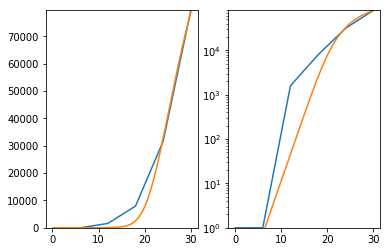

In [12]:
t = [0.0,6.0,12.0,18.0,24.0,30.0]
V = [1.0,1.0,10.0**(3.2),10**(3.9),10**(4.5),10**(4.9)]

initial_guess = [1,1,1,1,1,10**7]
minimizer_kwargs = {"method": 'Nelder-Mead'}
#res3 = basinhopping(cost_fun,initial_guess, minimizer_kwargs = minimizer_kwargs)
res3 = minimize(cost_fun,initial_guess,method='Nelder-Mead')

[ru,r_max,rt,rp,rs,kr] = res3.x

m = te.loada(model)
m.unpacking_rate = ru
m.replicating_rate=r_max
m.translating_rate = rt
m.packing_rate = rp
m.secreting_rate = rs
m.kr = kr

s = m.simulate(t[0],t[-1],1000,['time','A'])

plt.subplot(1, 2, 1)
plt.plot(t,V)
plt.plot(s[:,0],s[:,1])
plt.ylim([V[0],V[-1]])

plt.subplot(1, 2, 2)
plt.plot(t,V)
plt.plot(s[:,0],s[:,1])
plt.yscale('log')
plt.ylim([V[0],V[-1]])

plt.show()